In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv('../_data/Очищенные данные.csv', sep=',', index_col=0, encoding='utf-8')

In [3]:
df.head()

,DT,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
nplv,,,,,,,,,,,,,,,,,,,,,
г683863<887,2070-06-21 02:00:00,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,0.132332,0.139860,...,0.12,2.6,0.0,NaN,57.2,0.5,8.1,0.13,2.3,NaN
г683863<888,2070-06-21 02:58:00,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,0.221605,0.165186,...,0.11,2.4,0.0,NaN,60.3,0.5,6.3,0.12,2.6,NaN
г683863<978,2070-06-25 02:57:00,29.0,42.716667,16.683333,42.716667,2.623711,0.433500,0.113524,0.189868,0.133175,...,0.15,2.2,0.0,NaN,56.9,0.6,7.9,0.11,2.2,NaN
г683863<979,2070-06-25 03:59:00,20.0,42.050000,18.716667,42.050000,2.692771,0.459085,0.124202,0.218667,0.192129,...,0.39,1.8,0.0,NaN,50.9,0.3,13.2,0.13,2.0,NaN
г683863<97:,2070-06-25 04:52:00,23.0,41.666667,20.183333,41.666667,2.829225,0.454145,0.088234,0.182319,0.153034,...,0.20,2.3,0.0,NaN,49.0,1.0,12.6,0.20,2.2,NaN


In [5]:
df['химшлак последний SiO2'] = df['химшлак последний SiO2'].fillna(0)
df['химшлак последний Al2O3'] = df['химшлак последний Al2O3'].fillna(0)

#Количество пропусков в колонках, где они есть
cols = df.columns
nan_cols=[col for col in cols if df[col].isnull().values.any()]
nan_number = {col:df[col].isna().sum() for col in nan_cols}
aim_col = 'химшлак последний CaO'
nan_number

{'t обработка': 2,
 'ПСН гр.': 585,
 'сыпуч известь РП': 747,
 'сыпуч кокс пыль УСТК': 3,
 'сыпуч  кокс. мелочь КМ1': 15,
 'сыпуч  шпат плав.': 185,
 'ферспл CaC2': 69,
 'химсталь последний Ca': 48,
 'химсталь последний N': 1}

## SimpleImputers

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

def simple_impute(df, col, strategy):
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    new_col = col+'_'+strategy
    df[new_col] = imp_col
    return df, new_col

def knn_impute(df, col):
    imputer = KNNImputer(n_neighbors=2)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    imp_col = [item[0] for item in imp_col.tolist()]
    new_col = col+'_knn'
    df[new_col] = imp_col
    return df, new_col


In [37]:
#Стратегия mean
df_imp = df[nan_cols]
mean_cols=[]
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'mean')
    mean_cols.append(new_col)

#Стратегия median 
median_cols=[]
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'median')
    median_cols.append(new_col)
    
#Стратегия freq 
freq_cols = []
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'most_frequent')
    freq_cols.append(new_col)

    
#Стратегия knn 
knn_cols = []
for col in nan_cols:
    df_imp, new_col = knn_impute(df_imp, col)
    knn_cols.append(new_col)



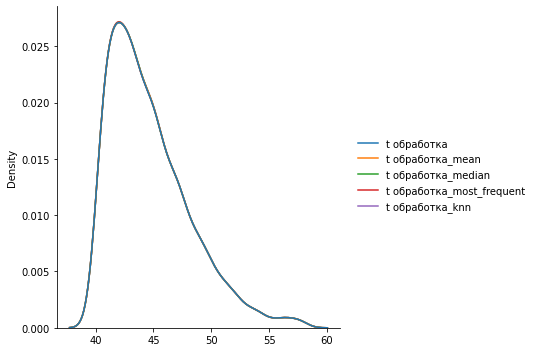

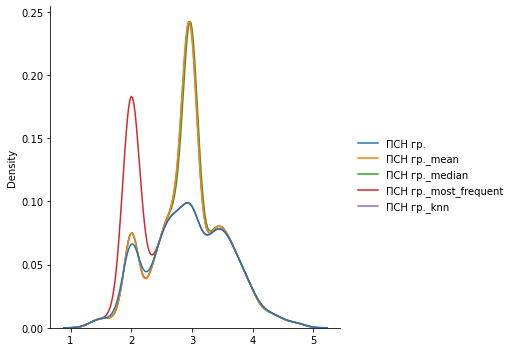

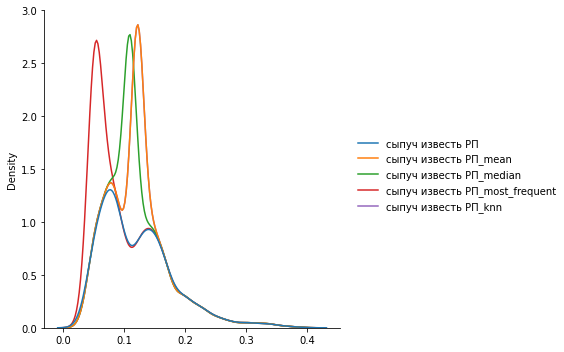

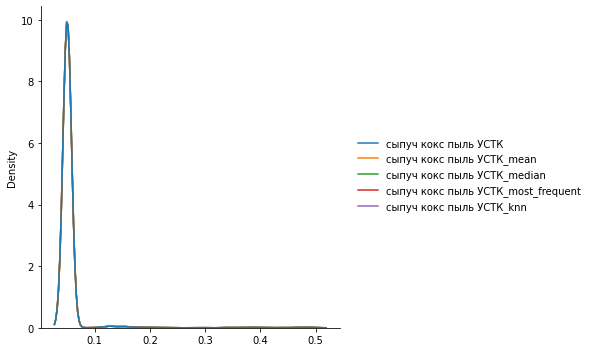

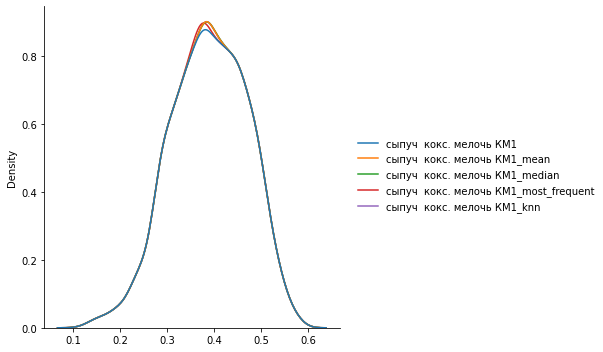

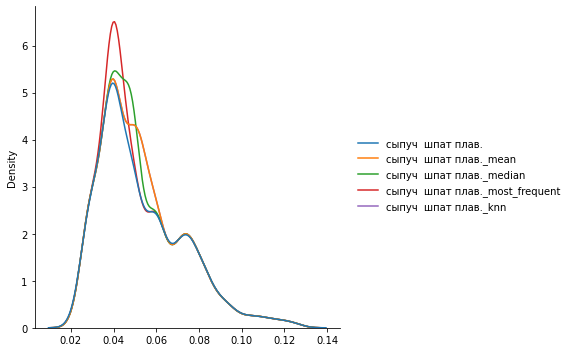

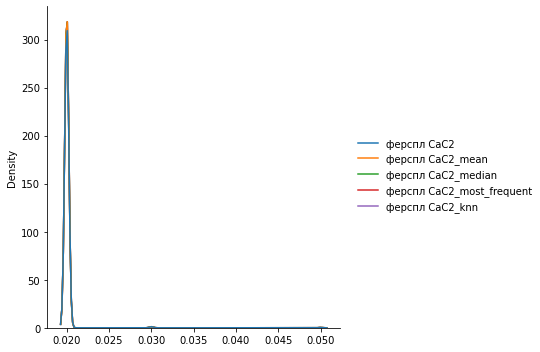

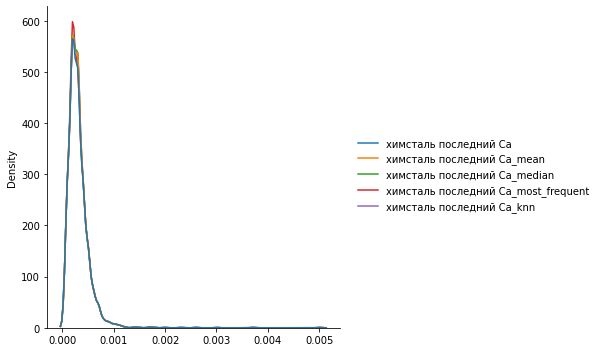

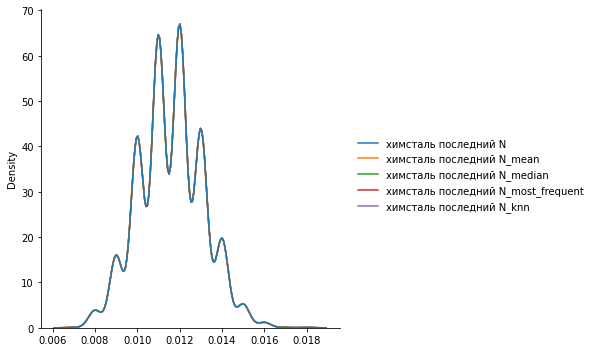

In [39]:
for ind, item in enumerate(nan_cols):
    c=[item, mean_cols[ind],median_cols[ind],freq_cols[ind], knn_cols[ind]]
    sns.displot(df_imp[c], kind='kde')
    plt.show()
    

In [42]:
#Датасет с заполненными пропусками через knn
df = df.merge(df_imp[knn_cols], how='left', on='nplv')
df = df.drop(nan_cols, axis=1)
df

,DT,t вып-обр,t под током,t продувка,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,...,химшлак последний SiO2,t обработка_knn,ПСН гр._knn,сыпуч известь РП_knn,сыпуч кокс пыль УСТК_knn,сыпуч кокс. мелочь КМ1_knn,сыпуч шпат плав._knn,ферспл CaC2_knn,химсталь последний Ca_knn,химсталь последний N_knn
nplv,,,,,,,,,,,,,,,,,,,,,
г683863<887,2070-06-21 02:00:00,24.0,17.950000,43.350000,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,...,0.0,43.350000,2.952798,0.121042,0.050,0.346,0.061,0.02,0.0009,0.012
г683863<888,2070-06-21 02:58:00,17.0,19.816667,46.183333,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,...,0.0,46.183333,2.952798,0.077000,0.050,0.390,0.059,0.02,0.0002,0.013
г683863<978,2070-06-25 02:57:00,29.0,16.683333,42.716667,0.433500,0.113524,0.189868,0.133175,0.041003,1595.0,...,0.0,42.716667,2.623711,0.121042,0.157,0.371,0.094,0.02,0.0001,0.013
г683863<979,2070-06-25 03:59:00,20.0,18.716667,42.050000,0.459085,0.124202,0.218667,0.192129,0.040402,1602.0,...,0.0,42.050000,2.692771,0.190000,0.050,0.492,0.059,0.02,0.0002,0.013
г683863<97:,2070-06-25 04:52:00,23.0,20.183333,41.666667,0.454145,0.088234,0.182319,0.153034,0.040831,1582.0,...,0.0,41.666667,2.829225,0.121042,0.050,0.494,0.059,0.02,0.0003,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
г68386398;7,2071-04-21 06:55:00,33.0,17.850000,42.200000,0.471755,0.137332,0.139956,0.176122,0.041047,1586.0,...,24.6,42.200000,4.000000,0.199000,0.050,0.508,0.039,0.02,0.0003,0.012
г68386398;8,2071-04-21 07:46:00,34.0,18.533333,42.050000,0.465055,0.112868,0.096618,0.140631,0.040180,1579.0,...,23.4,42.050000,2.689759,0.121042,0.050,0.506,0.049,0.02,0.0004,0.011
г68386398;9,2071-04-21 08:58:00,13.0,20.750000,47.850000,0.470500,0.153456,0.174962,0.130023,0.039660,1578.0,...,25.2,47.850000,3.000000,0.128000,0.050,0.502,0.060,0.02,0.0003,0.012
